# Kaggle Dating App Analysis

Link: https://www.kaggle.com/code/utkarshx27/dating-app-users-data-analysis

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
%pylab inline

import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import warnings
warnings.filterwarnings('ignore')

## Load in both data sets

In [3]:
df = pd.read_csv('user_instances.csv', index_col=0)

View data set:

In [4]:
df.head(10)

,age,name,counts_pictures,counts_profileVisits,counts_kisses,flirtInterests_chat,flirtInterests_friends,flirtInterests_date,connectedToFacebook,isVIP,...,hasBirthday,highlighted,distance,locked,mobile,online,whazzup,pictureId,userId,isSystemProfile
gender,,,,,,,,,,,,,,,,,,,,,
F,25,daeni,4,8279,239,True,True,True,False,False,...,False,False,175.000000,False,True,False,Nur tote fische schwimmen mit dem strom,4e3842f79b70e7ea57000064,55303fc3160ba0eb728b4575,False
F,22,italiana 92,5,663,13,True,True,True,False,False,...,False,False,138.000000,False,True,False,Primaveraaa<3,4e3d34bf5d2bce7b160006a3,552e7b61c66da10d1e8b4c82,False
F,20,Qqkwmdowlo,3,22187,1015,True,True,False,False,False,...,False,False,77.300003,False,False,False,Je pense donc je suis. Instagram quedev,4eef8b81ebf2c8f64000000c,54c92738076ea1b5338b4735,False
F,24,Baby dee,18,7339,180,True,False,True,False,False,...,False,False,194.000000,False,True,True,Wicked Wonderland💕❤️,4ef9434cca61bece6a000002,54f2b4ce0b6ea1177e8b4d18,False
F,24,Anna,13,18672,492,False,True,False,False,False,...,False,False,318.000000,False,True,True,💚 ✅ Instagram : anna_lem0n,4f10cbc1883fa97a5f000015,54ecbb39170ba08b488b4aa5,False
F,23,Feelinchen,6,19091,1348,True,False,True,False,False,...,False,False,175.000000,False,True,False,🌸🗻🌸,4f317525883fa9636900000e,54fc1786170ba041758b4577,False
F,20,chantal,14,29984,2389,True,True,True,False,False,...,False,False,81.400002,False,True,False,🙊🙉🙈,4f3516420c84d3dd23000001,550c8310066ea13f808b4b35,False
F,24,rina1990,1,5979,147,True,True,True,False,False,...,False,False,315.000000,False,False,True,:-),4fa0fb54883fa90e0d0005d6,53745af3150ba023158b4588,False
F,22,anniwhat,3,10450,421,True,True,False,False,False,...,False,False,148.000000,False,True,True,live louder and laught longer ♡,4fb4198f883fa90e04000031,53eb2d41ea6da1bb178b4aa0,False


## Data Cleanup

View number of missing columns

In [5]:
df.isna().sum()

age                          0
name                         0
counts_pictures              0
counts_profileVisits         0
counts_kisses                0
flirtInterests_chat          0
flirtInterests_friends       0
flirtInterests_date          0
connectedToFacebook          0
isVIP                        0
isVerified                   0
lastOnline                   1
lastOnlineTs                 1
lang_count                   0
lang_fr                      0
lang_en                      0
lang_de                      0
lang_it                      0
lang_es                      0
lang_pt                      0
city                       209
locationCity                10
locationCitySub           2851
userInfo_visitDate        2907
countDetails                 0
crypt                        0
flirtstar                    0
freshman                     0
hasBirthday                  0
highlighted                  0
distance                     0
locked                       0
mobile  

After viewing, we chose to drop locationCitySub and userInfo_visit_Date due to the almost completely incomplete data. 

In [6]:
df.drop(columns=['locationCitySub', 'userInfo_visitDate'], inplace=True)

In [7]:
df.columns

Index(['age', 'name', 'counts_pictures', 'counts_profileVisits',
       'counts_kisses', 'flirtInterests_chat', 'flirtInterests_friends',
       'flirtInterests_date', 'connectedToFacebook', 'isVIP', 'isVerified',
       'lastOnline', 'lastOnlineTs', 'lang_count', 'lang_fr', 'lang_en',
       'lang_de', 'lang_it', 'lang_es', 'lang_pt', 'city', 'locationCity',
       'countDetails', 'crypt', 'flirtstar', 'freshman', 'hasBirthday',
       'highlighted', 'distance', 'locked', 'mobile', 'online', 'whazzup',
       'pictureId', 'userId', 'isSystemProfile'],
      dtype='object')

Fill in the rest of the NA columns with 0

In [8]:
df.fillna(value='?', inplace=True)

Check if it worked

In [9]:
df.isna().any().sum()

0

View cleaned data set

In [10]:
df.head(20)

,age,name,counts_pictures,counts_profileVisits,counts_kisses,flirtInterests_chat,flirtInterests_friends,flirtInterests_date,connectedToFacebook,isVIP,...,hasBirthday,highlighted,distance,locked,mobile,online,whazzup,pictureId,userId,isSystemProfile
gender,,,,,,,,,,,,,,,,,,,,,
F,25,daeni,4,8279,239,True,True,True,False,False,...,False,False,175.000000,False,True,False,Nur tote fische schwimmen mit dem strom,4e3842f79b70e7ea57000064,55303fc3160ba0eb728b4575,False
F,22,italiana 92,5,663,13,True,True,True,False,False,...,False,False,138.000000,False,True,False,Primaveraaa<3,4e3d34bf5d2bce7b160006a3,552e7b61c66da10d1e8b4c82,False
F,20,Qqkwmdowlo,3,22187,1015,True,True,False,False,False,...,False,False,77.300003,False,False,False,Je pense donc je suis. Instagram quedev,4eef8b81ebf2c8f64000000c,54c92738076ea1b5338b4735,False
F,24,Baby dee,18,7339,180,True,False,True,False,False,...,False,False,194.000000,False,True,True,Wicked Wonderland💕❤️,4ef9434cca61bece6a000002,54f2b4ce0b6ea1177e8b4d18,False
F,24,Anna,13,18672,492,False,True,False,False,False,...,False,False,318.000000,False,True,True,💚 ✅ Instagram : anna_lem0n,4f10cbc1883fa97a5f000015,54ecbb39170ba08b488b4aa5,False
F,23,Feelinchen,6,19091,1348,True,False,True,False,False,...,False,False,175.000000,False,True,False,🌸🗻🌸,4f317525883fa9636900000e,54fc1786170ba041758b4577,False
F,20,chantal,14,29984,2389,True,True,True,False,False,...,False,False,81.400002,False,True,False,🙊🙉🙈,4f3516420c84d3dd23000001,550c8310066ea13f808b4b35,False
F,24,rina1990,1,5979,147,True,True,True,False,False,...,False,False,315.000000,False,False,True,:-),4fa0fb54883fa90e0d0005d6,53745af3150ba023158b4588,False
F,22,anniwhat,3,10450,421,True,True,False,False,False,...,False,False,148.000000,False,True,True,live louder and laught longer ♡,4fb4198f883fa90e04000031,53eb2d41ea6da1bb178b4aa0,False


## Analysis

### Q1) What is the average number of kisses by age? Which age group tends to send the most kisses?

In [11]:
df.groupby('age')['counts_kisses'].mean().sort_values(ascending=False)

age
27    661.000000
20    226.251295
21    213.308642
19    194.415761
23    160.310195
26    141.965517
24    139.185990
22    135.687623
25    116.713018
18      0.000000
28      0.000000
Name: counts_kisses, dtype: float64

Upon seeing the 27-year old outlier, we decided to check the population of each age to gain further insights. 

In [12]:
df.groupby('age')['age'].count()

age
18      1
19    368
20    386
21    324
22    509
23    461
24    414
25    338
26    116
27      1
28      1
Name: age, dtype: int64

### Q2) What age is most likely to receive higher profile visits (in hundreds of thousands)?

In [13]:
df.groupby('age')['counts_profileVisits'].sum()

age
18          0
19    1738804
20    1970961
21    1626480
22    1710000
23    1731415
24    1348423
25     994201
26     323900
27       8755
28          0
Name: counts_profileVisits, dtype: int64

<Axes: xlabel='age'>

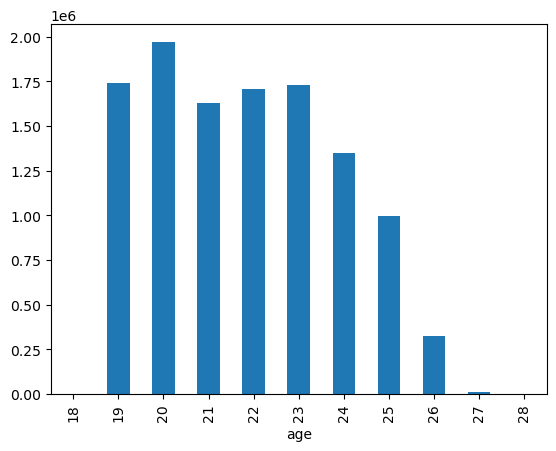

In [14]:
df.groupby('age')['counts_profileVisits'].sum().plot(kind='bar')

### Q3)(ML Question) Predict whether or not a user is less than 23 years old based on non-categorical variables. 

Create design tree classifier

In [15]:
dt = tree.DecisionTreeClassifier(max_depth=2)

Use a for loop to show the number of unique values in each column

In [16]:
for c in df.columns:
    print(c + ' ' + str(df[c].nunique()) )

age 11
name 2182
counts_pictures 31
counts_profileVisits 2169
counts_kisses 596
flirtInterests_chat 2
flirtInterests_friends 2
flirtInterests_date 2
connectedToFacebook 1
isVIP 2
isVerified 2
lastOnline 2671
lastOnlineTs 2671
lang_count 9
lang_fr 2
lang_en 2
lang_de 2
lang_it 2
lang_es 2
lang_pt 2
city 1117
locationCity 1369
countDetails 36
crypt 2
flirtstar 2
freshman 2
hasBirthday 2
highlighted 2
distance 868
locked 2
mobile 2
online 2
whazzup 1600
pictureId 2919
userId 2841
isSystemProfile 2


Make dummy variables for all categorical variables

In [17]:
df = pd.get_dummies(df, columns=['name','lastOnline','lastOnlineTs', 'city',
                                'locationCity','countDetails','pictureId','userId'
                                ],dummy_na=True)

Make whazzup binary (did they send a message or not)

In [18]:
df2 = df.copy()
df2['whazzup'] = df2.whazzup.apply(lambda x: 1.0 if x== '?' else 0.0)
df2.columns

Index(['age', 'counts_pictures', 'counts_profileVisits', 'counts_kisses',
       'flirtInterests_chat', 'flirtInterests_friends', 'flirtInterests_date',
       'connectedToFacebook', 'isVIP', 'isVerified',
       ...
       'userId_?', 'userId_b4e5e6854867b90d7d9e0265eab01fc3',
       'userId_beb2d6f1aad73d898044ac378ca68e39',
       'userId_cb958a9459216acd4dd06f213fe63685',
       'userId_d1fff0dd66910a3e4af0bb8d2fb418ad',
       'userId_d5a7edbcb59fcb092871bdcde7f142ca',
       'userId_dc186f3855343c9f096c484f6d363aac',
       'userId_e05ec5709ac69271411c0a10a2591e72',
       'userId_e532a6060fe4e5902c66086d905a9d53', 'userId_nan'],
      dtype='object', length=15842)

Set the new data set equal to df

In [19]:
df1=df2
df1

,age,counts_pictures,counts_profileVisits,counts_kisses,flirtInterests_chat,flirtInterests_friends,flirtInterests_date,connectedToFacebook,isVIP,isVerified,...,userId_?,userId_b4e5e6854867b90d7d9e0265eab01fc3,userId_beb2d6f1aad73d898044ac378ca68e39,userId_cb958a9459216acd4dd06f213fe63685,userId_d1fff0dd66910a3e4af0bb8d2fb418ad,userId_d5a7edbcb59fcb092871bdcde7f142ca,userId_dc186f3855343c9f096c484f6d363aac,userId_e05ec5709ac69271411c0a10a2591e72,userId_e532a6060fe4e5902c66086d905a9d53,userId_nan
gender,,,,,,,,,,,,,,,,,,,,,
F,25,4,8279,239,True,True,True,False,False,False,...,0,0,0,0,0,0,0,0,0,0
F,22,5,663,13,True,True,True,False,False,False,...,0,0,0,0,0,0,0,0,0,0
F,20,3,22187,1015,True,True,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
F,24,18,7339,180,True,False,True,False,False,False,...,0,0,0,0,0,0,0,0,0,0
F,24,13,18672,492,False,True,False,False,False,False,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F,20,8,1101,46,True,True,True,False,False,False,...,0,0,0,0,0,1,0,0,0,0
F,23,8,8681,141,True,True,True,False,False,False,...,0,0,0,0,0,0,0,0,1,0
F,23,8,8682,141,True,True,True,False,False,False,...,0,0,0,0,0,0,0,0,1,0


Train the decision tree

In [20]:
X = df1.drop(columns='whazzup')
Y = df1.whazzup

Train the decision tree classifier

In [21]:
dt.fit(X,Y)

DecisionTreeClassifier(max_depth=2)

View the decision tree

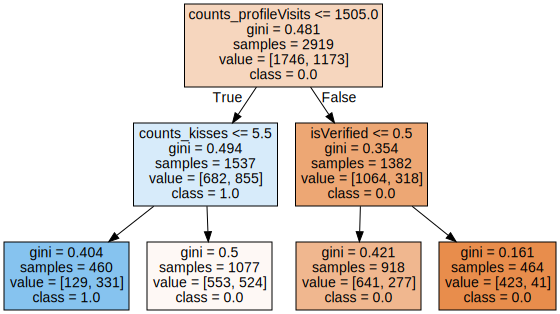

In [22]:
import graphviz
# This code will visualize a decision tree dt, trained with the attributes in X and the class labels in Y
dt_feature_names = list(X.columns)
dt_target_names = [str(s) for s in Y.unique()]
dot_data =tree.export_graphviz(dt, feature_names=dt_feature_names, class_names=dt_target_names, filled=True)  
graph = graphviz.Source(dot_data) 
graph

## Discussion

# Finding 1

Brief Summary: Generally, there seems to be a pattern that younger users (ages 19-21) receive more kisses than those who are older (22-26).

Data Validation

Kisses by age:

<img src="1.1.png" />

Count of users:

<img src="1.2.png" />

Managerial Insights: In order to increase profit for the dating app site, it would be helpful to encourage younger people to download the app, as more users are likely to give them “kisses” and utilize the platform. 

# Finding 2

Brief Summary: We notice that there is a similar pattern in the data in regards to profile visits vs kisses. 23 year old users have the third highest profile visits, while 19 and 20 year olds stay in 1st and 2nd place.


Data Validation:

<img src="2.1.png" />

As a pie chart:

<img src="2.2.png" />

Managerial Insights: The creators of the dating app would benefit from offering tips on “how to make your profile more attractive” to those age ranges that receive less profile visits. They would likely receive more visits, leading to more usage on the platform.

# Finding 3

Brief Summary: Women tend to rely on external validation (either through # of profile visits or # of kisses) to debate whether or not they will send the first message

Data Validation: Recall, 1 means no whazzup (or that they didn't send the first message), 0 means they did send the first message. The first graph shows that with less kisses, the user is much less likely to send the first message. 

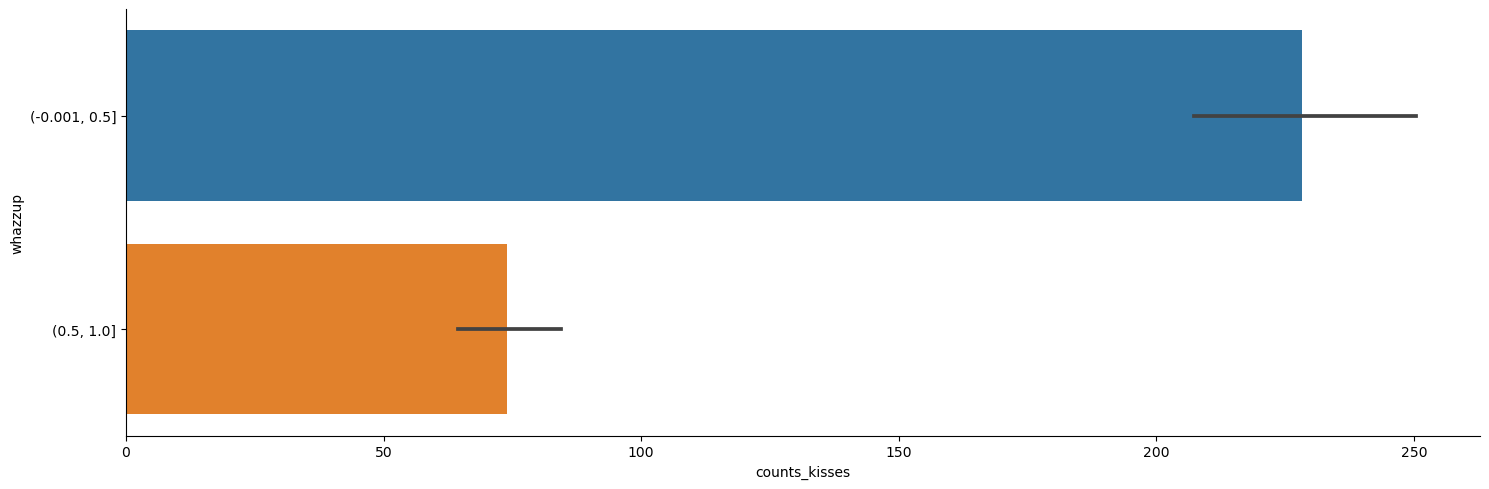

In [35]:
df3 = df2.copy()
df3['whazzup']=pd.cut(df2.whazzup, 2)
sns.catplot(y='whazzup', data=df3, x='counts_kisses', aspect=3, kind='bar')

This graph shows the same thing, but with profile visits instead.

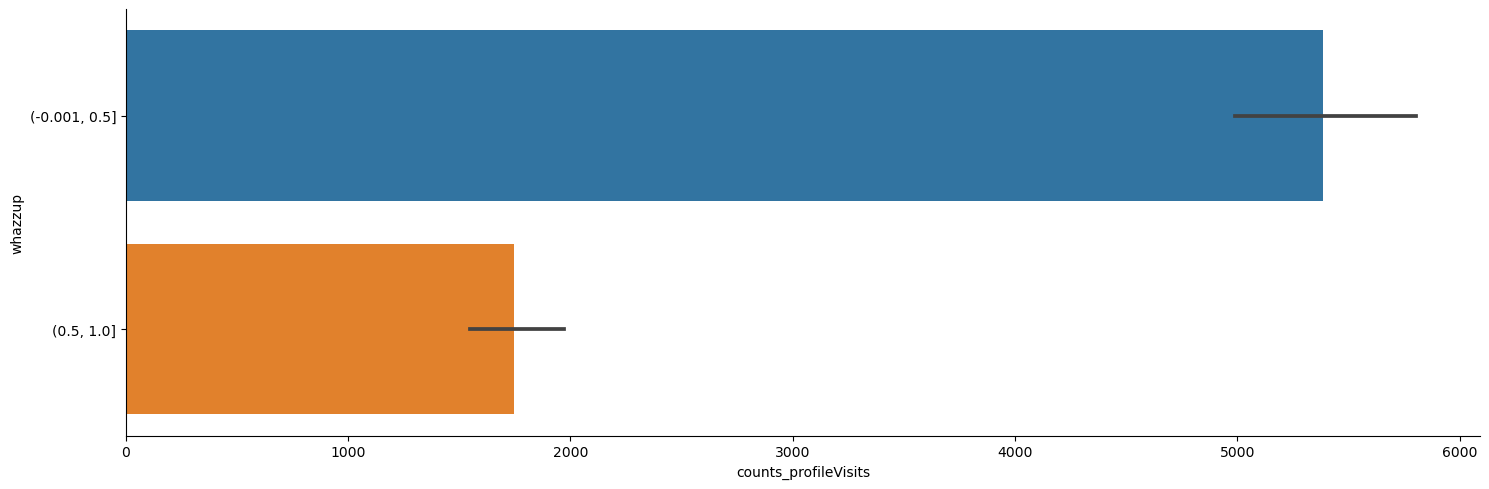

In [36]:
df3['whazzup']=pd.cut(df2.whazzup, 2)
sns.catplot(y='whazzup', data=df3, x='counts_profileVisits', aspect=3, kind='bar')

Managerial Insights: Loovoo should implement a private profile feature, where their profile counts/# of kisses are not publicly displayed to level the playing field. 